In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import  Dense
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy


Need to add the `with_info` attribute because we are requesting for dataset_info along with dataset as the output.
* `with_info` is false by default and will raise an error if we ask for dataset without specifying it as `True`
* `as_supervised` returns input and labels if it is True or else it only returns the input

In [2]:
dataset, dataset_info = tfds.load('malaria', with_info = True, as_supervised = True, shuffle_files = True, split=['train'])

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Shuffling /root/tensorflow_datasets/malaria/1.0.0.incomplete6I5YKU/malaria-train.tfrecord*...:   0%|          …

Dataset malaria downloaded and prepared to /root/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.


In [3]:
dataset_info

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_path=PosixGPath('/tmp/tmpq7sqp0qitfds'),
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection in thin blood smear images},

Here the dataset is a dictionary, so we need to select a single value and then use `take()`

In [4]:
for data in dataset[0].take(5):
  print(data)

(<tf.Tensor: shape=(103, 103, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
(<tf.Tensor: shape=(151, 115, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
       

In [5]:
def splits(dataset,TR,VR,TEST):
  DATASET_SIZE = len(dataset)
  train_dataset = dataset.take(int(TR*DATASET_SIZE))
  val_test_dataset = dataset.skip(int(TR*DATASET_SIZE))
  val_dataset = val_test_dataset.take(int(VR*DATASET_SIZE))
  test_dataset = val_test_dataset.skip(int(VR*DATASET_SIZE))
  return train_dataset,val_dataset,test_dataset

In [6]:
TRAIN_RATIO = 0.8
TEST_RATIO = 0.1
VAL_RATIO = 0.1

# dataset = tf.data.Dataset.range(10)
train_dataset,val_dataset,test_dataset = splits(dataset[0],TRAIN_RATIO,VAL_RATIO,TEST_RATIO)
print(list(train_dataset.take(1).as_numpy_iterator()),
      list(val_dataset.take(1).as_numpy_iterator()),
      list(test_dataset.take(1).as_numpy_iterator()))

[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), 1)] [(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
     

# Dataset Visualization



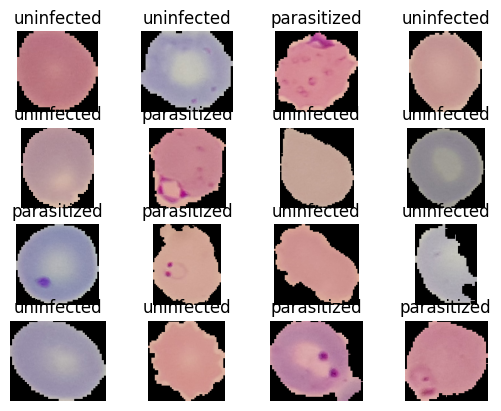

In [7]:
for i, (image,label) in enumerate(train_dataset.take(16)):
  ax=plt.subplot(4,4,i+1)
  plt.imshow(image)
  plt.title(dataset_info.features['label'].int2str(label))
  plt.axis('off')

# Data Preprocessing

In [8]:
IMAGE_SIZE = 224
def resize_rescale(image,label):
  return tf.image.resize(image, (IMAGE_SIZE, IMAGE_SIZE))/255.0 , label

In [9]:
train_dataset = train_dataset.map(resize_rescale)
val_dataset = val_dataset.map(resize_rescale)
test_dataset = test_dataset.map(resize_rescale)
for image, label in train_dataset.take(1):
  print(image , label)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(1, shape=(), dtype=int64)


In [10]:
train_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [11]:
val_dataset = val_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

Each image will have 150528 input features (224x224x3). When these are sent to a dense layer(assuming the layer has 1000 neurons) we have around 150M input features for the next layer.

---


So to have this problem solved we use a convolutional layer where each neuron is not mapped to every single neuron in the next layer, hence reducing the number of features.<br>
* Adding a padding to our input will help the corner cases have more weight, they are not ignored entirely.

<br>Learn more
[here](https://poloclub.github.io/cnn-explainer/) (more importantly go to the Understanding Hyperparameters section for the perfect visualisation).
<br>To learn more about image kernels visit this [site](https://setosa.io/ev/image-kernels/)


# Model Creation

Normalisation is very important to reduce the number of computations to be performed and also to increase the efficiency (also improves the accuracy in some cases, it did here)

In [15]:
lenet_model = tf.keras.Sequential([
    InputLayer(input_shape = (IMAGE_SIZE,IMAGE_SIZE,3)),

    Conv2D(filters = 6 ,kernel_size = 3 , strides = (1,1), padding = 'valid', activation= 'relu'),
    BatchNormalization(),
    MaxPool2D(pool_size = 2, strides = 2),

    Conv2D(filters = 16 ,kernel_size = 3 , strides = (1,1), padding = 'valid', activation= 'relu'),
    BatchNormalization(),
    MaxPool2D(pool_size = 2, strides = 2),

    Flatten(),

    Dense(100, activation = "relu"),
    BatchNormalization(),

    Dense(10, activation = "relu"),
    BatchNormalization(),

    Dense(1, activation = "sigmoid")

 ])
lenet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 6)       168       
                                                                 
 batch_normalization_4 (Batc  (None, 222, 222, 6)      24        
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 6)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_5 (Batc  (None, 109, 109, 16)     64        
 hNormalization)                                                 
                                                      

In [16]:
lenet_model.compile(optimizer = Adam(learning_rate= 0.01),
              loss = BinaryCrossentropy(),
              metrics = 'accuracy')

In [17]:
history = lenet_model.fit(train_dataset,validation_data = val_dataset, epochs = 10, verbose = 1)

Epoch 1/10
689/689 [==============================] - 51s 69ms/step - loss: 0.3179 - accuracy: 0.8674 - val_loss: 0.2700 - val_accuracy: 0.9205
Epoch 2/10
689/689 [==============================] - 54s 78ms/step - loss: 0.2050 - accuracy: 0.9340 - val_loss: 0.7035 - val_accuracy: 0.8679
Epoch 3/10
689/689 [==============================] - 54s 79ms/step - loss: 0.1797 - accuracy: 0.9438 - val_loss: 0.2679 - val_accuracy: 0.9325
Epoch 4/10
689/689 [==============================] - 47s 69ms/step - loss: 0.1689 - accuracy: 0.9482 - val_loss: 0.4748 - val_accuracy: 0.8987
Epoch 5/10
689/689 [==============================] - 47s 69ms/step - loss: 0.1475 - accuracy: 0.9546 - val_loss: 0.2133 - val_accuracy: 0.9397
Epoch 6/10
689/689 [==============================] - 53s 77ms/step - loss: 0.1438 - accuracy: 0.9555 - val_loss: 0.4829 - val_accuracy: 0.9078
Epoch 7/10
689/689 [==============================] - 56s 81ms/step - loss: 0.1253 - accuracy: 0.9598 - val_loss: 0.2496 - val_accuracy:

In [18]:
test_dataset = test_dataset.batch(1)
test_dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [19]:
test_dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [20]:
lenet_model.evaluate(test_dataset)

2757/2757 [==============================] - 22s 4ms/step - loss: 0.2198 - accuracy: 0.9347


[0.21975025534629822, 0.9347116351127625]

In [24]:
parasite_or_not(lenet_model.predict(test_dataset.take(1))[0][0])

1/1 [==============================] - 13s 13s/step


'P'

In [23]:
def parasite_or_not(a):
  if(a<0.5):
    return str('P')
  else:
    return str('U')

1/1 [==============================] - 0s 20ms/step


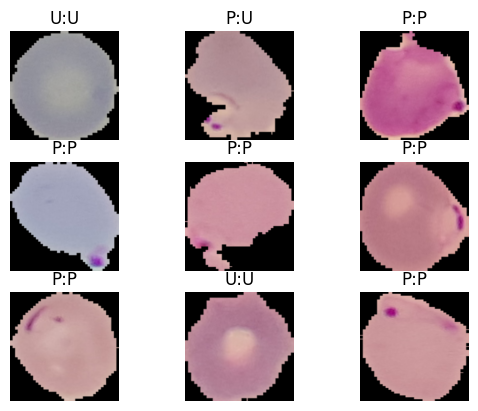

In [25]:
for i, (image,label) in enumerate(test_dataset.take(9)):

  ax = plt.subplot(3,3,i+1)
  plt.imshow(image[0])
  plt.title(str(parasite_or_not(label.numpy()[0])) + ':' + str(parasite_or_not(lenet_model.predict(image)[0][0]  )))
  plt.axis('off')